# 01. Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#defining path

path = r'C:\Users\Jonathan\Desktop\Amsterdam AirBnB'

In [4]:
#importing dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_details_clean_2.csv'), index_col = False)

# 02. Data Cleaning

In [5]:
df.columns

Index(['price', 'number_of_reviews', 'review_scores_rating', 'bathrooms',
       'bedrooms', 'availability_365', 'host_total_listings_count',
       'Review count category'],
      dtype='object')

In [6]:
df.shape

(20030, 8)

In [7]:
df.isnull().sum()

price                           0
number_of_reviews               0
review_scores_rating         2639
bathrooms                      10
bedrooms                        8
availability_365                0
host_total_listings_count       4
Review count category           0
dtype: int64

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_4100\420522003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['availability_365'], bins=25)


<Axes: xlabel='availability_365', ylabel='Density'>

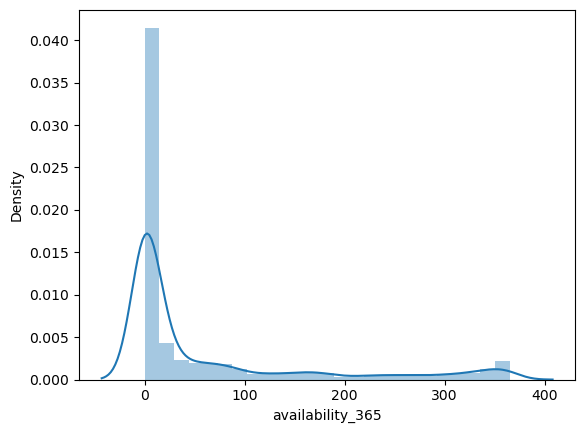

In [8]:
#checking for extreme values

sns.distplot(df['availability_365'], bins=25)

In [9]:
#check for mean

df['availability_365'].mean()

59.91367948077883

In [10]:
#check for median

df['availability_365'].median()

3.0

In [11]:
#check for maximum

df['availability_365'].max()

365

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_4100\1128879327.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=100)


<Axes: xlabel='price', ylabel='Density'>

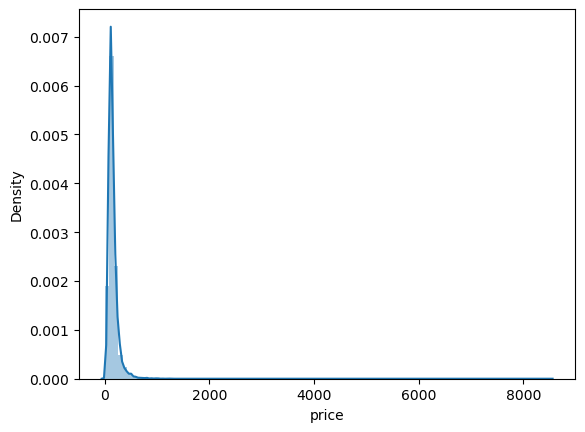

In [12]:
#checking for extreme values

sns.distplot(df['price'], bins=100)

In [13]:
#check for mean

df['price'].mean()

152.18117823265104

In [14]:
#check for median

df['price'].median()

125.0

In [15]:
#check for max

df['price'].max()

8500.0

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_4100\1678507458.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_of_reviews'], bins=25)


<Axes: xlabel='number_of_reviews', ylabel='Density'>

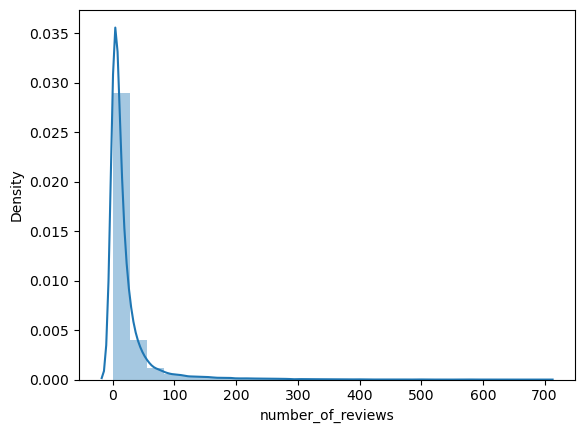

In [16]:
#checking for extreme values

sns.distplot(df['number_of_reviews'], bins=25)

In [17]:
#check for mean

df['number_of_reviews'].mean()

21.56045931103345

In [18]:
#check for median

df['number_of_reviews'].median()

8.0

In [19]:
#check for max

df['number_of_reviews'].max()

695

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_4100\2843525235.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['review_scores_rating'], bins=25)


<Axes: xlabel='review_scores_rating', ylabel='Density'>

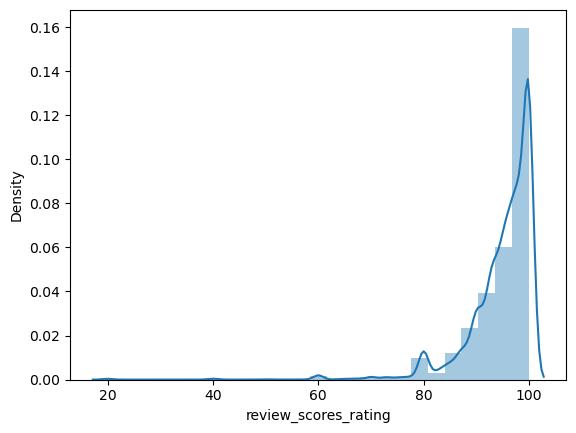

In [20]:
#checking for extreme values

sns.distplot(df['review_scores_rating'], bins=25)

In [21]:
#check for mean

df['review_scores_rating'].mean()

94.84951986659766

In [22]:
#check for median

df['review_scores_rating'].median()

97.0

In [23]:
#check for max

df['review_scores_rating'].max()

100.0

# Hypothesis

When Price is higher a rental property is more likely to be more available throughout the year. 

# 03. Data Prep for Regression

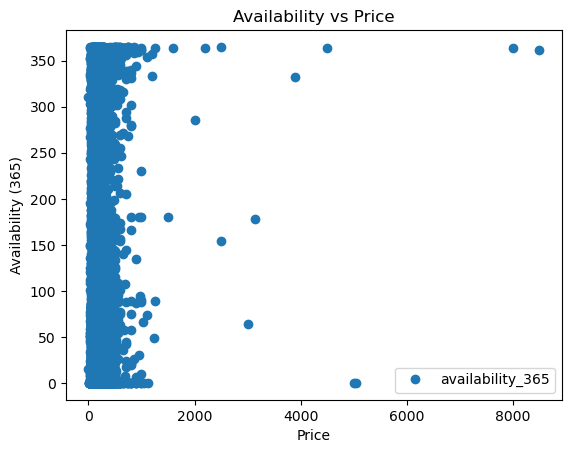

In [24]:
#Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'price', y='availability_365',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Availability vs Price')  
plt.xlabel('Price')  
plt.ylabel('Availability (365)')  
plt.show()

In [25]:
#Reshape the variables into NumPy arrays and put them into separate objects.

X = df['price'].values.reshape(-1,1)
y = df['availability_365'].values.reshape(-1,1)

In [26]:
X

array([[ 59.],
       [160.],
       [ 80.],
       ...,
       [ 80.],
       [ 55.],
       [220.]])

In [27]:
y

array([[ 44],
       [ 47],
       [198],
       ...,
       [210],
       [ 31],
       [ 14]], dtype=int64)

# 04. Regression Analysis

In [28]:
#Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
#Create a regression object.

regression = LinearRegression()  

#This is the regression object, which will be fit onto the training set.

In [30]:
#Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
#Predict the values of y using X.

y_predicted = regression.predict(X_test)

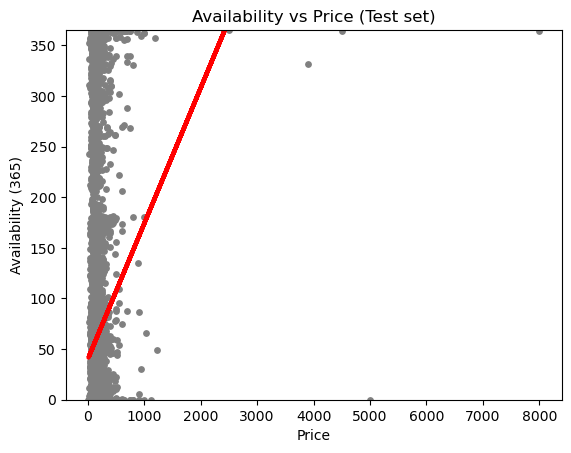

In [32]:
#Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Availability vs Price (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Availability (365)')
ax = plt.gca()
ax.set_ylim([0, 365])
plot_test.show()

# Test Set Analysis Interpretation

Looking at the chart we can see that the regression line doesnt exactly match where the data points are located. Visually this looks like the model may end up being inaccurate and unsuitable for use.

In [33]:
#Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
#This is the mean squared error
r2 = r2_score(y_test, y_predicted) 
#This is the R2 score.

In [34]:
#Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13395145]]
Mean squared error:  10541.912549663128
R2 score:  0.013786199593695092


# Model Performance Statistics

MSE: As we are working with about 20,000 data points this is a very large Mean Squared Error meaning that as interpreted from the visualization, this regression line is not an accurate representation of the data.

R2 score: Looking at this R2 score we can see that is extremely low meaning that the model does not do well explaining variance in the data. 0.0138 would be equivalent to 1.4% out of 100%. 

The model does not seem to be accurate and thus not a good fit. 

In [35]:
#Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,60.056862
1,14,58.717347
2,0,60.056862
3,7,50.680260
4,315,57.377833
5,270,54.029047
6,321,46.661717
7,25,53.359289
8,350,55.368561
9,0,51.885823


# Final Thoughts/Reflections

The model performed extremely poorly. This model performed even worse than I had hypothesized it to and thus a regression model might not be the best way to analyze this data. Some possible data biases that might have affected the data might be the extreme outliers that I kept to keep the data as realistic as possible. The data collection may not have been accurate as well due to AirBnB not differentiating 'booked' and 'unavailable' nights so the resulting availability metric may not be entirely accurate. Some hosts may also not keep their calandars updated so that may result in data being inaccurate. 

# Fitting Model to Training Set (Extra practice)

In [36]:
#Predict.

y_predicted_train = regression.predict(X_train)

In [37]:
#Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
#Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13395145]]
Mean squared error:  10561.486698516544
R2 score:  0.029044232933569503


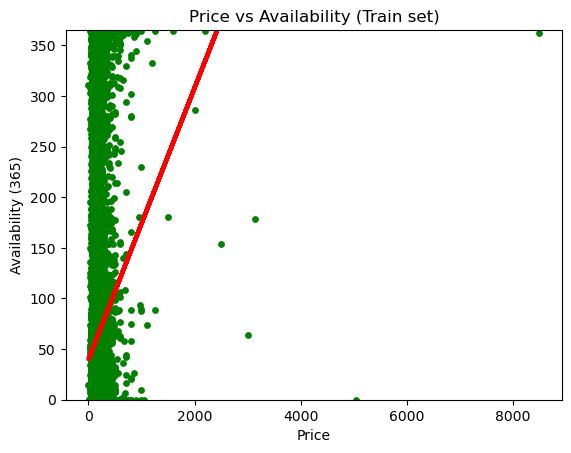

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Availability (Train set)')
plot_test.xlabel('Price')
plot_test.ylabel('Availability (365)')
ax = plt.gca()
ax.set_ylim([0, 365])
plot_test.show()